In [1]:
import io
import json
import re
import requests
import time
from pdfminer.high_level import extract_text
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"
######
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
###
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
###
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"

In [3]:
resposta =  requests.get(url)

In [4]:
with io.BytesIO(resposta.content) as abrir_pdf:
    text = extract_text(abrir_pdf)

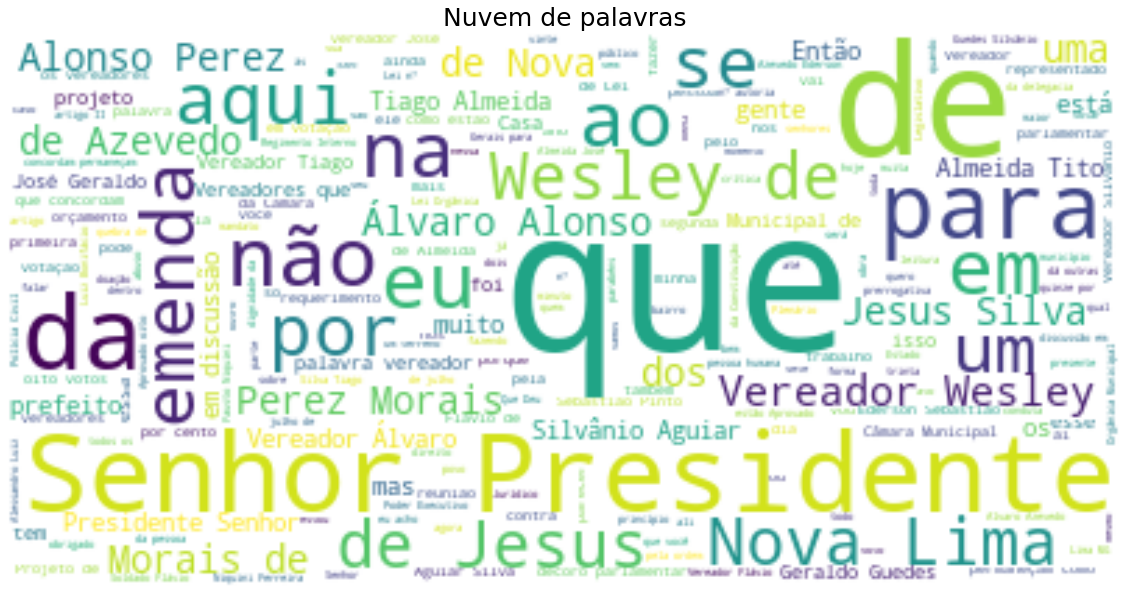

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [6]:
text = text.rstrip().replace('\n', '').lower()

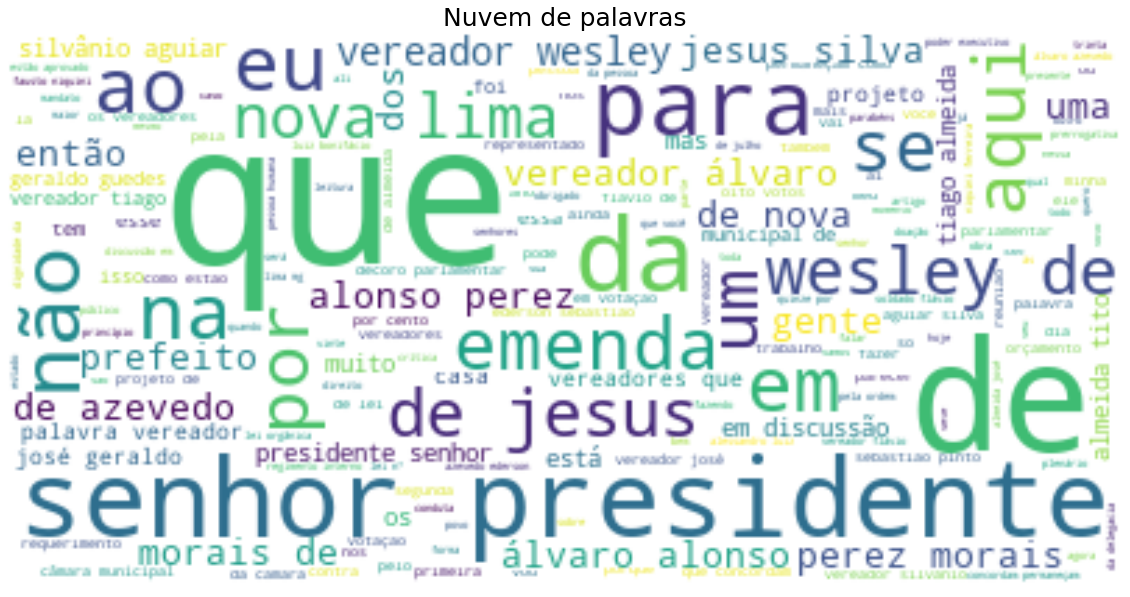

In [7]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')

In [8]:
#word_tokenize(text)

In [9]:
tokenizer_projetos2020 = RegexpTokenizer('\d*.\d*d*/\d*')
numero_projetos2020 = tokenizer_projetos2020.tokenize(text)

In [10]:
tokenizer_projetos2019 = RegexpTokenizer('\d*\/\d*')
numero_projetos2019 = tokenizer_projetos2019.tokenize(text)

In [11]:
tokens = word_tokenize(text)


pontuacao = [
             '(',
             ')',
             ';',
             ':',
             '[',
             ']',
             ',',
             '-',
             '?',
             'nº',
             's',
             '"',
             "'",
             '.',
             '”',
             '“',
             '”',
             '“',
             '-',
             '–',
           '...',
             '‘',
             '’',
             '/',
             '%',
    '.________________________________________________________',
    '._____________________________________',
    '.___________________________________________',
    '.__________________________________________',
    '._____________________',
    '.______________________________________________________________',
                ]

stop_words = set(stopwords.words('portuguese'))

stop_words_custom = ['0', '1', '10', '17', '18', '2', '2020', '3', '4', '5', '50', '6', '7', '8', '9', 'aberta', 'abril', 'achando-se', 
                     'acho', 'agosto', 'agradecer', 'aguiar', 'ah', 'ainda', 'alessandro', 'alessandro luiz bonifácio', 'algum', 'almeida', 
                     'alonso', 'amigo', 'apresentação', 'aqui', 'ata', 'autoria', 'azevedo', 'bilhete', 'boa', 'boi', 'bonifácio', 'carlos', 
                     'chamada', 'cinco', 'comissão', 'conferirem-nas', 'conforme', 'constatando-se', 'constituída', 'coxinha', 'câmara', 
                     'ddeclaro', 'declaro', 'desembro', 'desse', 'deus', 'devido', 'dez', 'dezenove', 'dezesseis', 'dezoito', 'dia', 'dias', 
                     'diretrizes', 'dispõe', 'documentos', 'dois', 'duas', 'dá', 'ederson', 'ederson sebastião pinto', 'emissão', 'emitiu', 
                     'encaminhado', 'encaminho', 'encerrada', 'entregue', 'então', 'errado', 'especial', 'especifica', 'estabelece', 'excelência', 
                     'executar', 'executivo', 'falar', 'fausto', 'fausto niquini ferreira', 'favor', 'favoráveis', 'favorável', 'fazer', 'ferreira',
                     'fevereiro', 'fez', 'flavio', 'flávio', 'flávio de almeida', 'fmfpm', 'gas', 'gente', 'geraldo', 'gostaria', 'grade', 'grande',
                     'guedes', 'gás', 'hoje', 'horas', 'indo', 'iniciar', 'integral', 'janeiro', 'jesus', 'josé', 'josé carlos de oliveira', 'julho',
                     'junho', 'justiça', 'kim', 'kim do gas', 'kim do gás', 'legal', 'lei', 'leitura', 'lima', 'limense', 'luiz', 'março', 'mesa', 
                     'mil', 'minutos', 'morais', 'municipais', 'municipal', 'município', 'nada', 'nenhum', 'niquini', 'nome', 'nova', 'nova',
                     'nova-limense', 'novembro', 'oi', 'oliveira', 'onde', 'ordem', 'outras', 'outros', 'outubro', 'palavra', 'parecer', 'pasta',
                     'perez', 'pessoas', 'pinto', 'plenário', 'poder', 'porque', 'portaria', 'possa', 'povo', 'prefeito', 'prefeitura', 'presente',
                     'presentes', 'presença', 'presidente', 'primeira', 'projeto', 'promulgação', 'proteção', 'providências', 'pudesse', 'pública',
                     'público', 'públicos', 'quatro', 'quebra', 'quero', 'quinze', 'realização', 'referente', 'registrar', 'remota', 'reuniu-se',
                     'se', 'sebastião', 'secretário', 'sede', 'segunda', 'sei', 'seis', 'senhor', 'ser', 'serviço', 'serviços', 'setembro',
                     'silva', 'silva', 'silvânio', 'silvânio aguiar silva', 'sob', 'sobre', 'solicito', 'tarde', 'tendo', 'ter', 'tiago', 
                     'tiago tito', 'tito', 'todos', 'tomada', 'trinta', 'três', 'um', 'vai', 'vamos', 'vereador', 'vereadores', 
                     'vice-presidente', 'vinte', 'virtual', 'virtualmente', 'vista', 'vossa', 'vota', 'wesley', 'wesley de jesus silva', 
                     'álvaro', 'álvaro', 'álvaro alonso perez morais de azevedo', 'âmbito', 'todas', 'casa', 'deste', 'vou', 'comprimentar','obrigado',
                    'certeza', 'bem', 'pode', 'toda', 'aí', 'sabe', 'queria', 'desejo','cidade', 'deputado', 'noite', 'lá', 'desta', 'requerimento',
                     'reunião', 'anos', 'sempre', 'pessoa', 'cumprimentar', 'estadual', 'momento', 'população', 'wendel',  'mandato', 'associação',
                    'nesse', 'nessa', 'legislativo', 'forma', 'partido', 'vice-prefeito', 'muita', 'diretora', 'rosana', 'cumprimento','legislativa',
                     'política', 'serginho', 'nesta', 'apoio', 'todo', 'esposa', 'junto', 'falou','estar', 'senhores', 'dar',
                    'joão', 'mesquita', 'ex-presidente','ordinária', 'ad', 'hoc','àqueles', 'assistem', 'tv', 'banqueta',
                    'demais', 'lislie', 'assembleia','vida', 'vez', 'chegar','precisa', 'situação', 'principalmente', 'posse', 'mim', 'nesse',
                    'dessa', 'disse', 'agora', 'neste', 'juntos', 'gosto', 'certo', 'cada', 'força', 'sucesso', 'feliz', 'graça', 'frente',
                    'assim', 'dentro', 'frente', 'váriros', 'varias', 'bota', 'tempo','espero', 'faz', 'parte', 'dessas', 'abraço', 'vão',
                    'pouco', 'estaremos', 'tudo', 'graças', 'segundo', 'várias', 'questão', 'aprendi', 'nesses','cumprimentos', 'amigos'
                    'amigos', 'trago', 'estará', 'deixar', 'querido', 'naturalmente', 'representando', 'história', 'dr', 'quanto', 'melhor',
                    'ver', 'merece','pares','disso', 'dizer','pedido', 'palavras','peço', 'doze', 'sabemos','fala','coisas', 'fazendo', 'lado',
                     'vários','abençõe', 'cumprimentá-los', 'nove','ali', 'votos', 'discussão', 'votação', 'sim', 'ontem', 'comunidade', 'coisa',
                     'vem', 'se', 'faça', 'posso', 'falei','fiz', 'inclusive', 'fica', 'ficar','bom', 'caso', 'pessoal','colocou','infelizmente',
                      'pedir','bicalho','mês','sendo', 'voltar', 'pauta','passando','hora','rua','passado','tanto', 'requer', 'outra','alguns',
                     'oito', 'falando','tratando-se','esperar','diga-se', 'verificando-se', 'afirmou', 'nova-limenses', 'aparte', 'colocar', 'artigo', 
                     'faço', 'fato', 'sete', 'têm','diz','extatamente', 'claro','tratar', 'dezembro','nunca','emenda', 'emendas','alterar',
                     'ressaltar', 'trata','realmente','senhora','emenda','altera', 'quer','comigo','opinião','atrás','deu','outro','cara',
                     'vendo', 'ouvir','assinar','acabou','redação','relação','concordam','parece','antes','existe','proximo','solicitação',
                     'cutucando', 'permaneçam', 'primeiro', 'aplausos','governo', 'assunto','presidindo','feitas','pedindo','semana','importante',
                     'puder','plenária', 'regimento', 'interno', 'olha', 'deliberação', 'problema','problemas','parabenizar','parabéns',
                     'próximo','moção','administração','dando','uns','obrigação','resolução','podem','saber','voltar','trabalhar', 'coração',
                     'fizeram','senão','continuar','cair','permite','verbal','exatamente','cala','boca','terça','feira','falo','participei',
                     'cima','interresante','conheço','exemplo','fico','naquele','vezes','solicitou','volto','logo', 'terça-feira', 'poderia',
                     'rogo','disponibilizar','legislação','repetir','durante','manhã','tão','cheguei','sério','jamais','horário','encerrar',
                    'concede','participou','convocação','verdade','unica','ninguém','pai','interessante','qualquer','única','reuniões',
                     'assinaturas', 'apostas', 'livro', 'próprio', 'declarou', 'seguida', 'convidou', 'pé', 'hino', 'nacional', 'após', 'comunicou', 
                     'extraordinária', 'encaminhadas', 'gabinetes', 'colocou-as', 'manifestou','unica','audiência','sala','projetos','trabalhos',
                     'li','ok','ii','façamos','ler','mandar','recomendação','dúvida','maior', 'porta','sentido','votaram','votações','servidor',
                     'assessor','servodores','feito','através','ultimo','paragáfo','jeito','passa','processo', 'empresa','simplesmente',
                     'número','estado','ajudar','talvez','incentivo', 'impacto','observação','igual','atenção', 'inteiro','resolver',
                     'dizendo','quê', 'tá', 'abrimos','uso','soneca','entendeu','representação','assiste','tranquilo','minuto', 'silêncio',
                     'conferirem-na','vizinho','ex-prefeito','institui','colocou-a','colocou', 'acrescentado','prioridade','faria',
                     'somente','desses','proferiu','abençoe','exceção','recebidas','discutindo','correspondência','vir','sair',
                     'mesma','quarta-feira','bacana','bem-vindo','passar','além','próxima','muitas','solicita','novamente','carinho',
                     'agradecendo','amor', 'anunciou','pronunciamento','adotiva', 'd','oportunidade','diferente','nenhuma','possível','vê',
                     'lugar','regularização','fizemos','prazo','promessas','quiser','início','entendi','último','feita','requerimentos','meio',
                     'maio','agradeço','tramitação', 'encaminhada','última','orgulho','acesso','registrado','colete','porta','colete',
                     'portas','fé','respeito','ajuda','levar','calendário','acompanha','impressionante','substituição','noventa','ano',
                     'atender','atendendo','desde','cinquenta','coloco','sanção','menos','enquanto','amigos','luta','diante','sessenta',
                     'regularizar','seguinte','percentual','algumas','inserido','viu','oitenta','daquela','deixa','ir','encontrava-se',
                     'explicar','época','intuito','total', 'baixo', 'art','data','parlamentar',
                    ]


#todo 
##  tokem com expressão regular xxxxx/2020
###
###
####

In [12]:
#organziar = []
#organizar = stop_words_custom
#organizar.sort()
#print(organizar,  sep=' ', end='\n',  flush=False)

In [13]:
len(tokens)

10333

In [14]:
resultado1 = [resultado for resultado in tokens if resultado not in stop_words]

In [15]:
print(len(resultado1))

7132


In [16]:
resultado2 = [resultado1 for resultado1 in resultado1 if resultado1 not in pontuacao]

In [17]:
print(len(resultado2))

5252


In [18]:
resultado3 = [resultado2 for resultado2 in resultado2 if resultado2 not in numero_projetos2020]

In [19]:
print(len(resultado3))

5243


In [20]:
resultado4 = [resultado3 for resultado3 in resultado3 if resultado3 not in numero_projetos2019]

In [21]:
print(len(resultado4))

5235


In [22]:
resultado5 = [resultado4 for resultado4 in resultado4 if resultado4 not in stop_words_custom]

In [23]:
print(len(resultado5))

2118


In [24]:
#portuguese_stemmer = SnowballStemmer('portuguese')

In [25]:
#resultado5 = []
#for i in resultado4:
    #print(portuguese_stemmer.stem(i))
    #resultado5.append(portuguese_stemmer.stem(i))
    
#resultado5 = word_tokenize(str(resultado5))
#len(resultado5)

In [26]:
#resultado5 = [resultado5 for resultado5 in resultado5 if resultado5 not in pontuacao]

In [27]:
#len(resultado5)

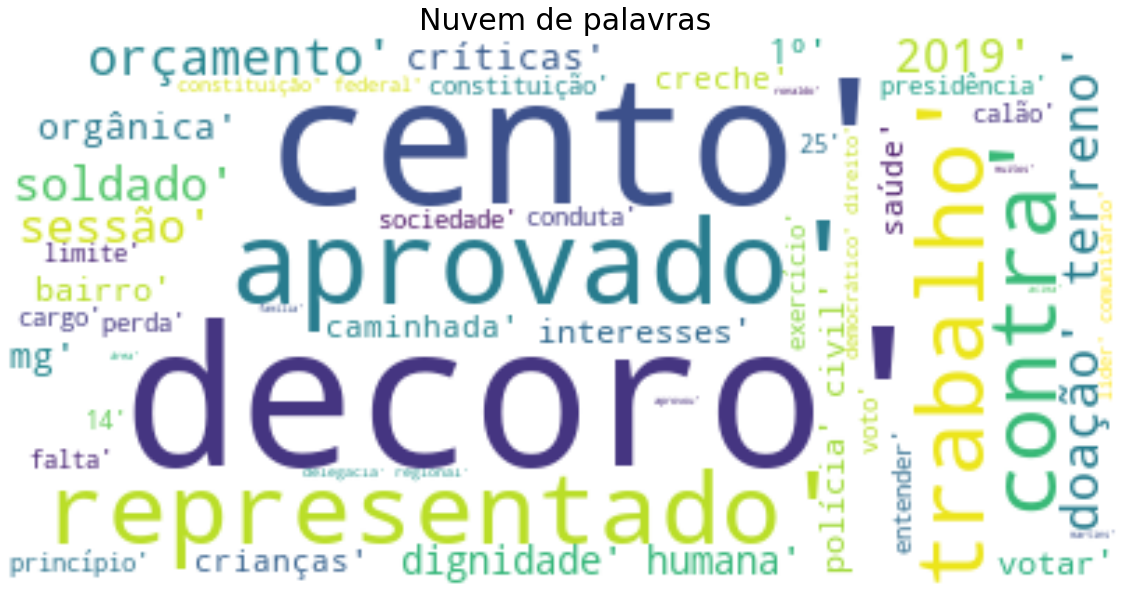

['existência', 'ausência', 'justificada', 'solicitar', 'falecimento', 'amiga', 'dona', 'lily', 'carmo', 'pereira', 'mãe', 'ana', 'lucy', 'lions', 'clube', 'funcionária', 'comercial', 'acrescentar', 'falecimento', 'dona', 'diná', 'barreto', 'martins', 'faleceu', 'enterrada', 'dona', 'diná', 'trabalho', 'área', 'educação', 'militou', 'religião', 'católica', 'sobras', 'acrescentasse', 'aprovado', 'função', 'falecimento', 'senhoras', 'lily', 'carmo', 'pereira', 'diná', 'barreto', 'martins', 'bancada', 'bancada', 'trabalho', 'recebi', 'mensagens', 'cleide', 'vivo', 'reginaldo', 'martins', 'acompanhando', 'trabalho', 'trabalho', 'companheiro', 'aniversário', 'dê', 'muitos', 'saúde', 'felicidade', 'caminhada', 'lutador', 'jantar', 'acabar', 'jantar', 'sergio', 'americano', 'filipe', 'mata', 'ex-vereador', 'ronaldo', 'aprovou', 'podia', 'soldado', 'setenta', 'soldado', 'felicidades', 'permita', 'comemorar', 'muitos', 'muitos', 'aniversariante', 'soldado', 'antecedê-lo', 'galeria', 'fiel', 'esc

In [28]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 50, max_font_size=70).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.title(title, size = 30)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    print(data)

show_wordcloud(resultado5,  'Nuvem de palavras')

In [29]:
fd = FreqDist(resultado5)
fd


FreqDist({'decoro': 22, 'cento': 18, 'aprovado': 14, 'terreno': 14, 'representado': 13, 'dignidade': 12, 'delegacia': 12, 'orçamento': 12, 'trabalho': 11, 'contra': 11, ...})

In [30]:

#fd = FreqDist(resultado3).plot()
#fd


In [31]:
fd = FreqDist(resultado5)
teste = []
for i in fd.items():
     teste.append(i)

teste.sort()

In [32]:
teste

[('01', 1),
 ('011', 1),
 ('02', 3),
 ('073.312.376-75', 1),
 ('103', 1),
 ('11', 2),
 ('112.757', 2),
 ('12', 2),
 ('1202', 1),
 ('13', 2),
 ('14', 5),
 ('15', 3),
 ('153', 1),
 ('158', 1),
 ('159', 1),
 ('16', 2),
 ('19', 2),
 ('190', 1),
 ('1º', 6),
 ('20', 2),
 ('2000', 1),
 ('2018', 2),
 ('2019', 5),
 ('2019.', 4),
 ('21', 2),
 ('22', 2),
 ('229', 1),
 ('23', 2),
 ('2302', 1),
 ('24', 2),
 ('25', 5),
 ('25.06.2019', 2),
 ('26', 2),
 ('27', 2),
 ('272', 1),
 ('277.672.216-87', 1),
 ('28', 3),
 ('28/06/2019', 1),
 ('29', 2),
 ('29.022', 2),
 ('29a', 1),
 ('2ª', 1),
 ('2º', 2),
 ('30', 1),
 ('31', 1),
 ('34000-279', 1),
 ('34006-077', 1),
 ('34006-083', 1),
 ('39', 4),
 ('3º', 3),
 ('42', 2),
 ('43', 2),
 ('500', 1),
 ('55', 4),
 ('59', 1),
 ('5º', 1),
 ('6,21', 1),
 ('7º', 2),
 ('847', 1),
 ('abaixo', 1),
 ('abençoar', 1),
 ('aberto', 2),
 ('abertura', 2),
 ('abrigo', 1),
 ('absoluta', 2),
 ('absolutamente', 1),
 ('abuse', 1),
 ('abuso', 6),
 ('acabar', 1),
 ('acerca', 1),
 ('acerta